In [1]:
!pip install kaggle

In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
# Step 1: Install and Configure Kaggle API
!pip install -q kaggle
!mkdir -p ~/.kaggle
from google.colab import files
files.upload()  # Upload kaggle.json here
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 2: Download the Dataset
!kaggle datasets download -d iamsouravbanerjee/house-rent-prediction-dataset

# Step 3: Unzip the Dataset
!unzip house-rent-prediction-dataset.zip

# Step 4: Load and Display the Dataset
import pandas as pd
data = pd.read_csv('House_Rent_Dataset.csv')
data.head()

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset
License(s): other
  0% 0.00/82.4k [00:00<?, ?B/s]
100% 82.4k/82.4k [00:00<00:00, 76.8MB/s]
Archive:  house-rent-prediction-dataset.zip
  inflating: Dataset Glossary.txt    
  inflating: House_Rent_Dataset.csv  


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [22]:
data.drop(columns=['Posted On','Point of Contact'], inplace=True)

In [23]:
data.isnull().sum()

,0
BHK,0
Rent,0
Size,0
Floor,0
Area Type,0
Area Locality,0
City,0
Furnishing Status,0
Tenant Preferred,0
Bathroom,0


In [24]:
data.shape

(4746, 10)

In [25]:
data.drop_duplicates().shape

(4738, 10)

In [26]:
X = data.drop('Rent', axis=1)
y = data['Rent']

In [27]:
for col in X.columns:
    if X[col].dtype == 'object':
        encoder = LabelEncoder()
        X[col] = encoder.fit_transform(X[col])

In [28]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
X_train.shape[1]

9

## Build the Model

In [30]:
# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
# Define the model with an explicit Input layer
# model = Sequential([
#     Input(shape=(X_train.shape[1],)),  # Explicit input layer
#     Dense(64, activation='relu'),
#     Dense(32, activation='relu'),
#     Dense(1)  # Output layer for regression
# ])

## Train Model

In [32]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.1, verbose=1)


Epoch 1/100
427/427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5312028160.0000 - mse: 5312028160.0000 - val_loss: 3934683136.0000 - val_mse: 3934683136.0000
Epoch 2/100
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12150489088.0000 - mse: 12150489088.0000 - val_loss: 3752251136.0000 - val_mse: 3752251136.0000
Epoch 3/100
427/427 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 10423772160.0000 - mse: 10423772160.0000 - val_loss: 3321400576.0000 - val_mse: 3321400576.0000
Epoch 4/100
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7548854784.0000 - mse: 7548854784.0000 - val_loss: 2743532288.0000 - val_mse: 2743532288.0000
Epoch 5/100
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3927622400.0000 - mse: 3927622400.0000 - val_loss: 2205077760.0000 - val_mse: 2205077760.0000
Epoch 6/100
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17543589888.0000 - mse: 17543589888.0000 - val_loss: 1913335936.0000 - val_mse: 1913335936.0000
Epoch 7/100
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 214

## Evaluate the Model

In [33]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Squared Error: 1755512852.8856041
Root Mean Squared Error: 41898.840710520904
R² Score: 0.5595118999481201


## Plot the Training History

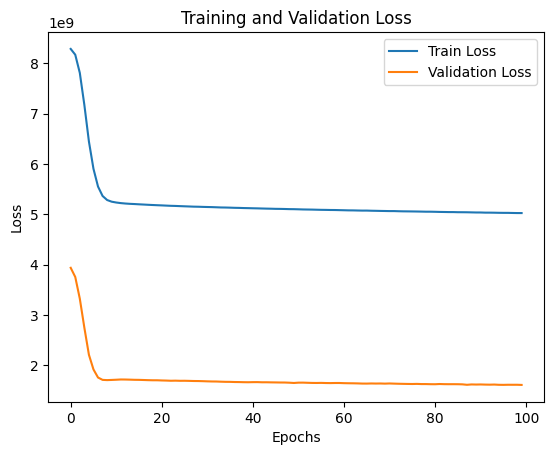

In [34]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

## Actual vs Prediction

In [35]:
# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred.flatten()  # Flatten to match dimensions
})

# Display the DataFrame
results_df

,Actual,Predicted
0,16000,1519.875000
1,12000,2499.920898
2,28000,55324.656250
3,8000,60457.300781
4,46000,150426.156250
...,...,...
945,18000,45440.402344
946,25000,4380.106445
947,14000,1428.012573
948,26000,3098.252930
